# Gemeinderatswahl 2024 in Freiburg

Hier verfolge und analysiere ich die Gemeinderatswahlergbnisse aus Freiburg im Breisgau. 

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import os
from matplotlib import pyplot as plt
import json
#import plotly.express as px
#import plotly.graph_objects as go
import geopandas 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
warnings.filterwarnings('ignore')
from functions_wahl import *

In [4]:
#Daten bekommen und kombinieren mit geografischen und statistischen Stadtdaten 
#get_and_save_komm() jetzt ausgezaehlt kein download mehr noetig
Stadtteile,Stadtbezirke=process_geo()
gesamt,comb2,wahl_bezirke=get_process_wahl()
joined=Stadtbezirke.join(comb2)

Wahlbezirke 247
ausgezaehlte Wahlbezirke 247


## Gesamtergebnis

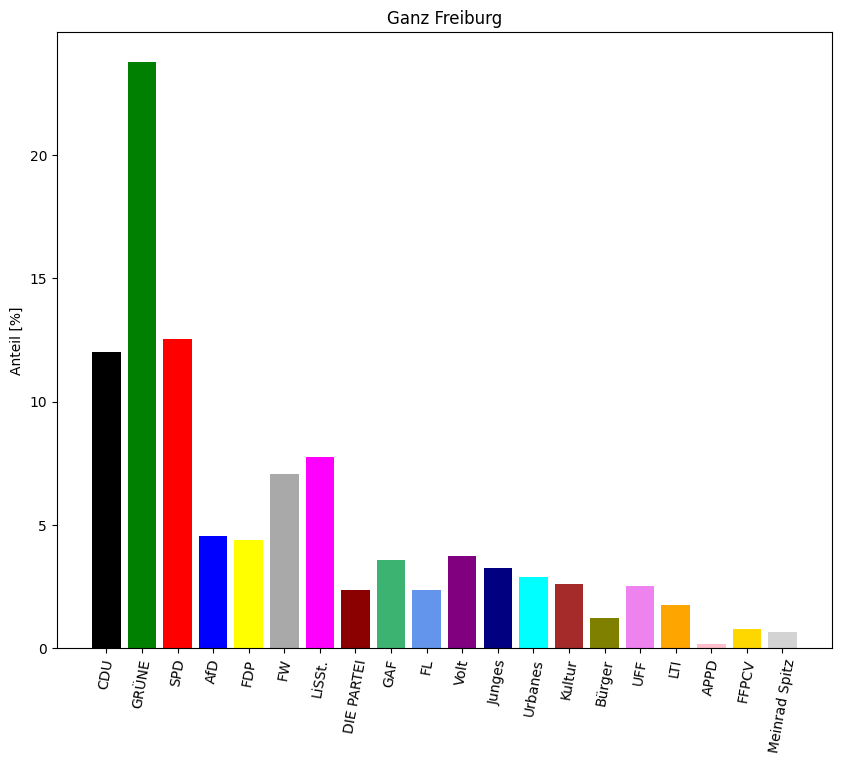

In [5]:
make_bar_plot(gesamt,title='Ganz Freiburg')

 48 wurden zugeteilt wie es sein sollte


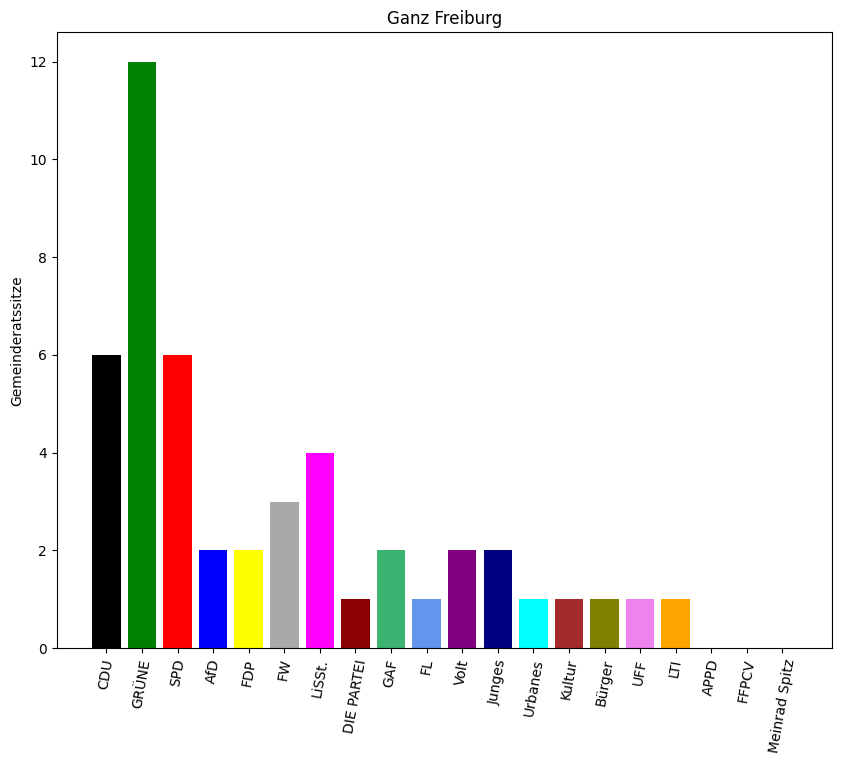

In [6]:
test_res=sainte_l(gesamt.loc[0,:])
make_bar_plot(gesamt,sitze=48,title='Ganz Freiburg')

Vergliechen mit 2019 verlieren die Gruenen, die Gruene Alternative Freiburg und Freiburg Lebenswert jeweils einenen Sitz. 

Die linke Liste gewinnt einen Sitz, und die neue List Volt 2 Sitze.


Nun Karten mit Parteianteil. 

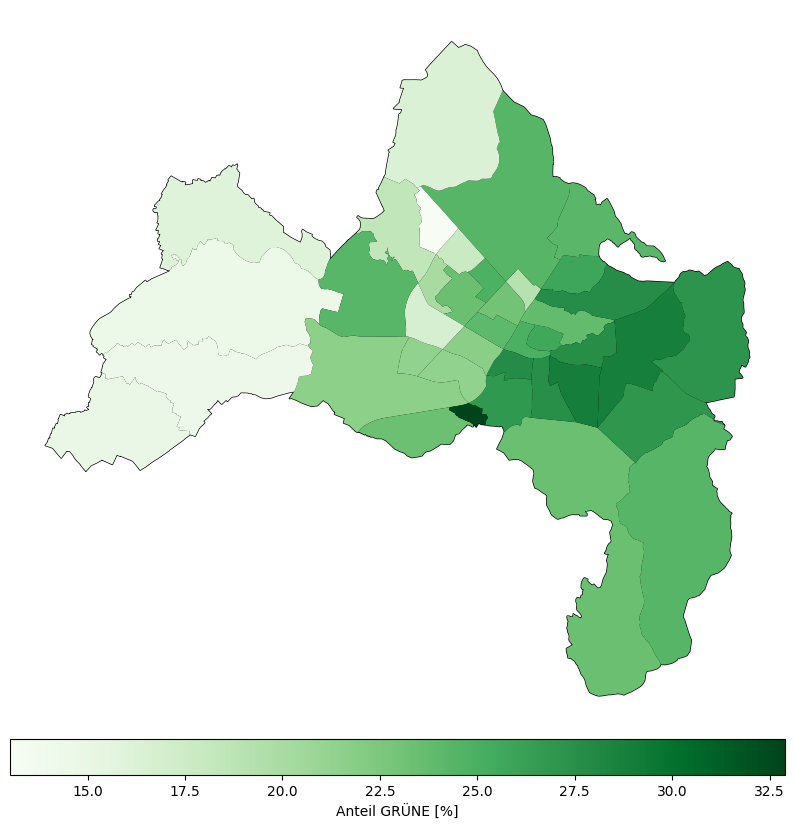

In [7]:
karte_stadtbezirke(joined,'GRÜNE')

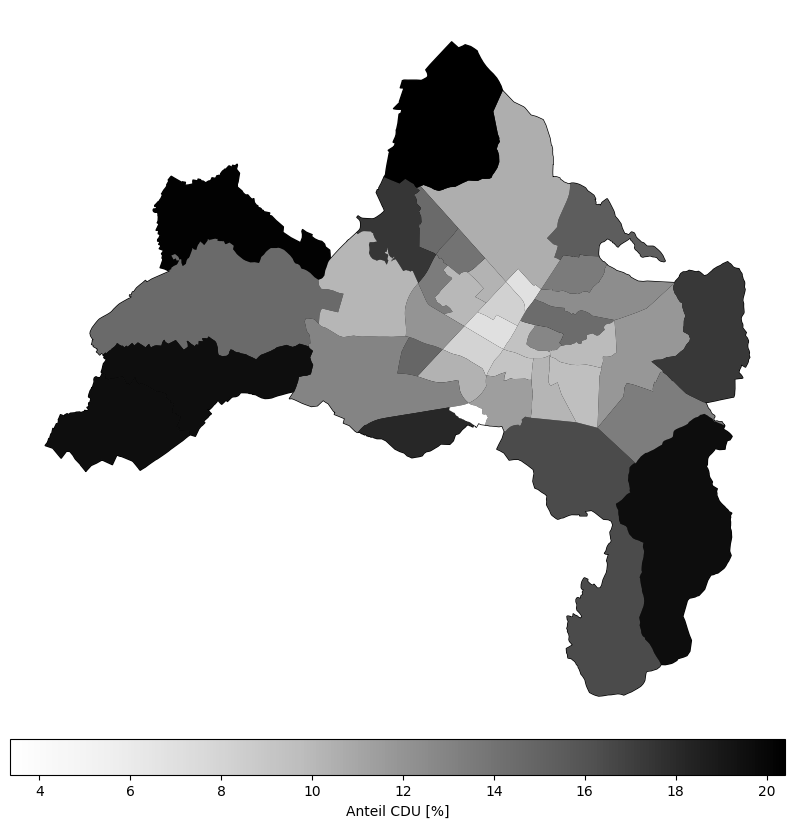

In [8]:
karte_stadtbezirke(joined,'CDU')

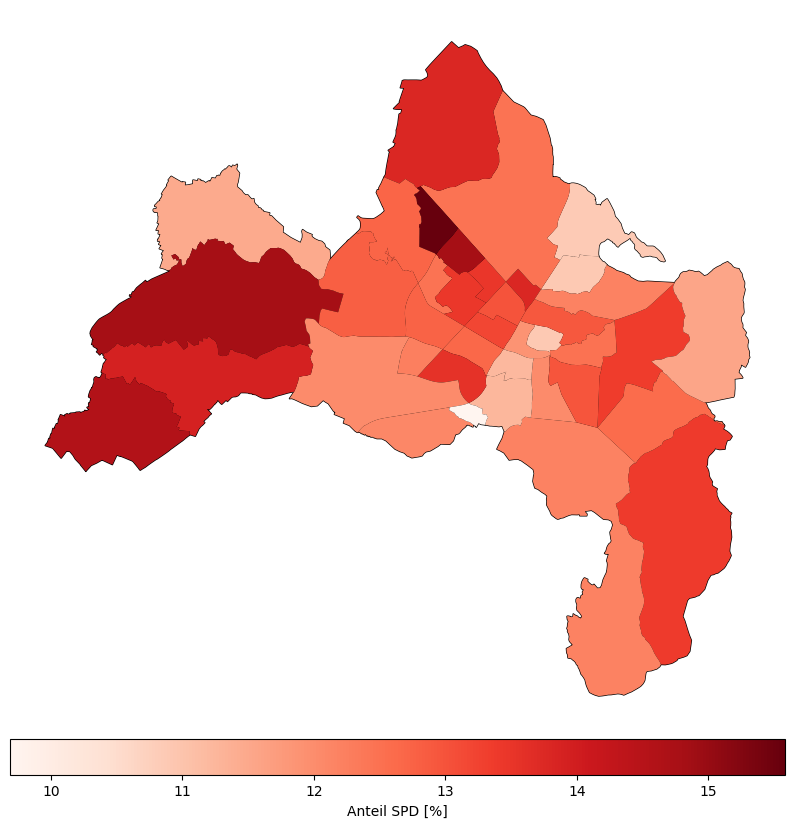

In [9]:
karte_stadtbezirke(joined,'SPD')

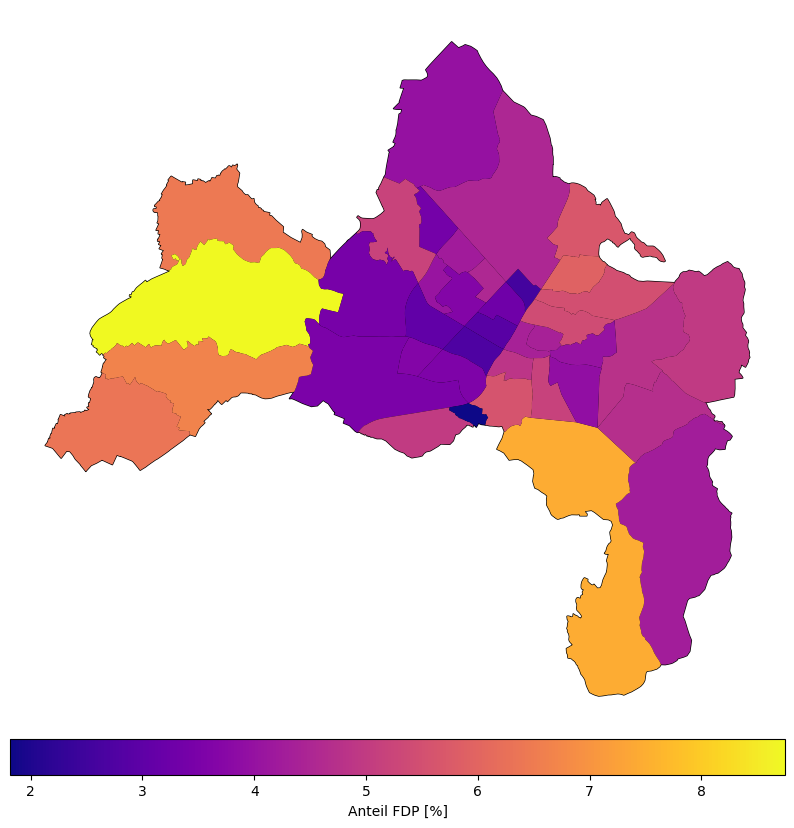

In [10]:
karte_stadtbezirke(joined,'FDP')

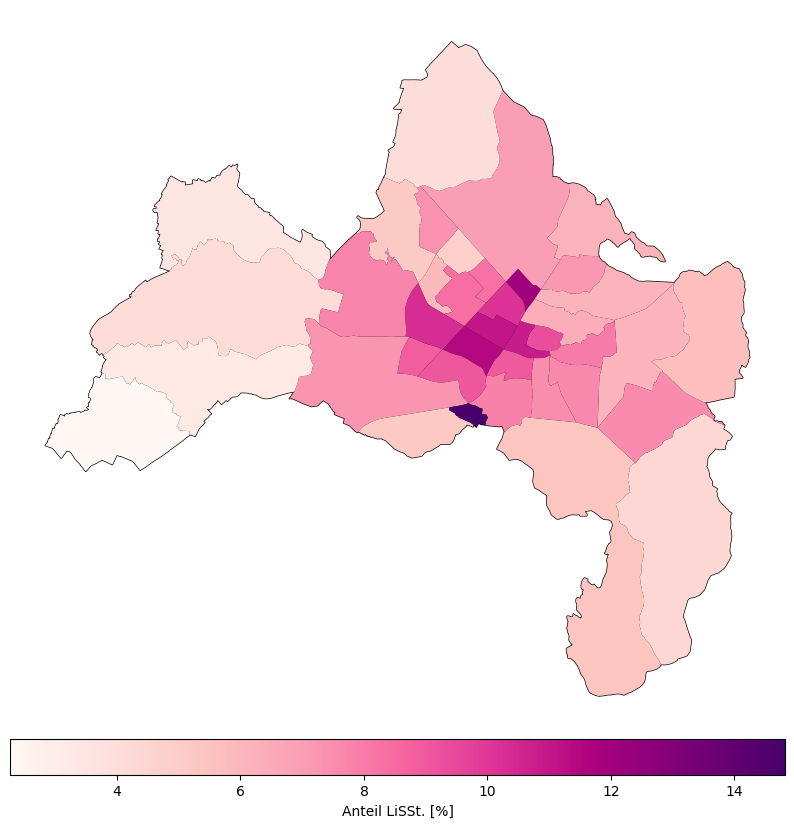

In [11]:
karte_stadtbezirke(joined,'LiSSt.')

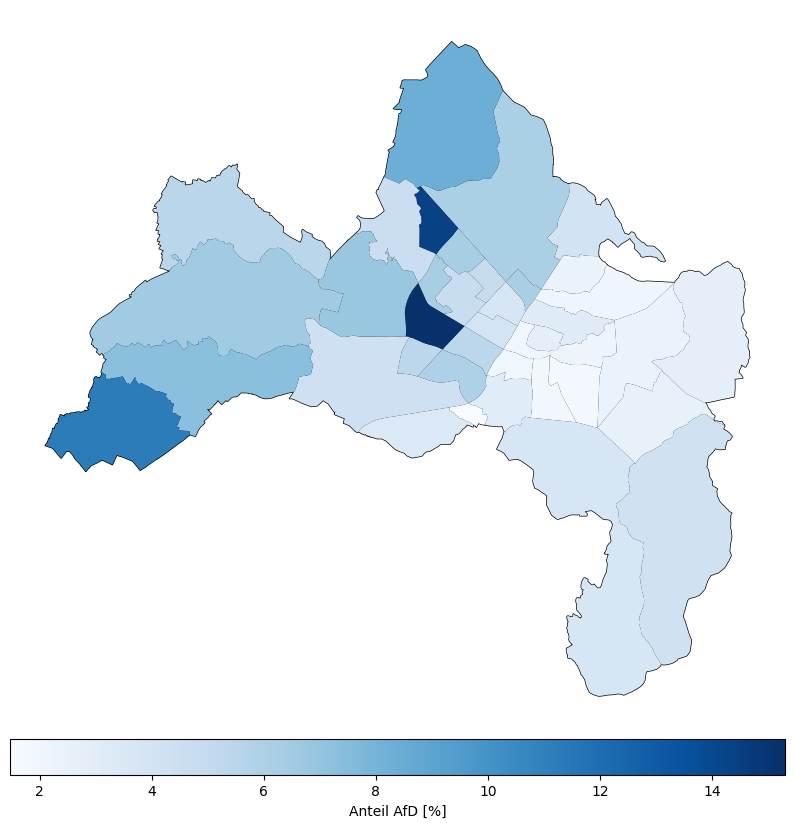

In [12]:
karte_stadtbezirke(joined,'AfD')

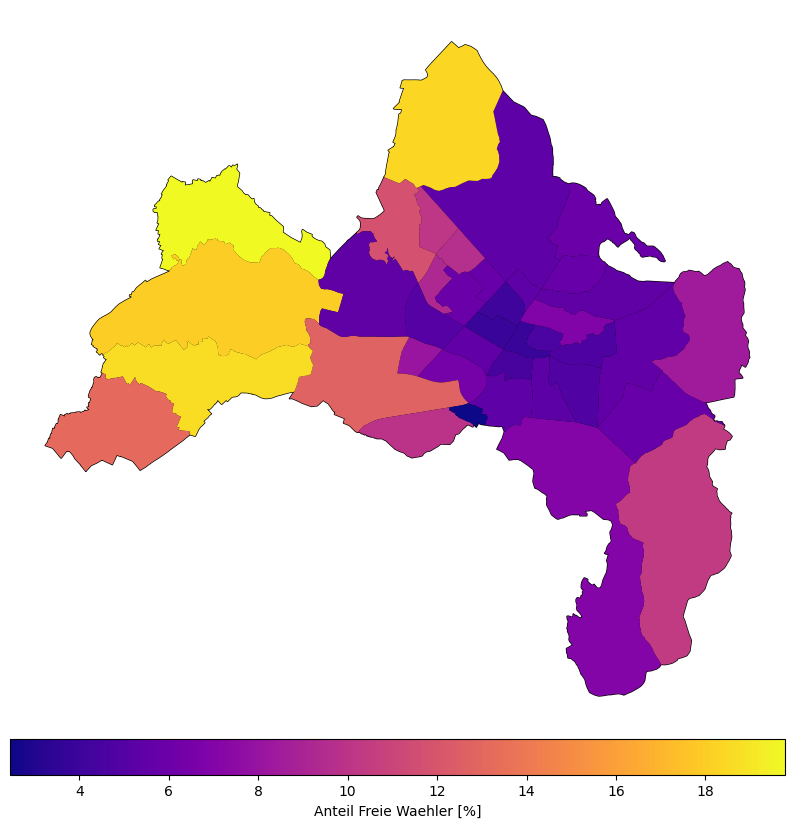

In [13]:
karte_stadtbezirke(joined,'FW')

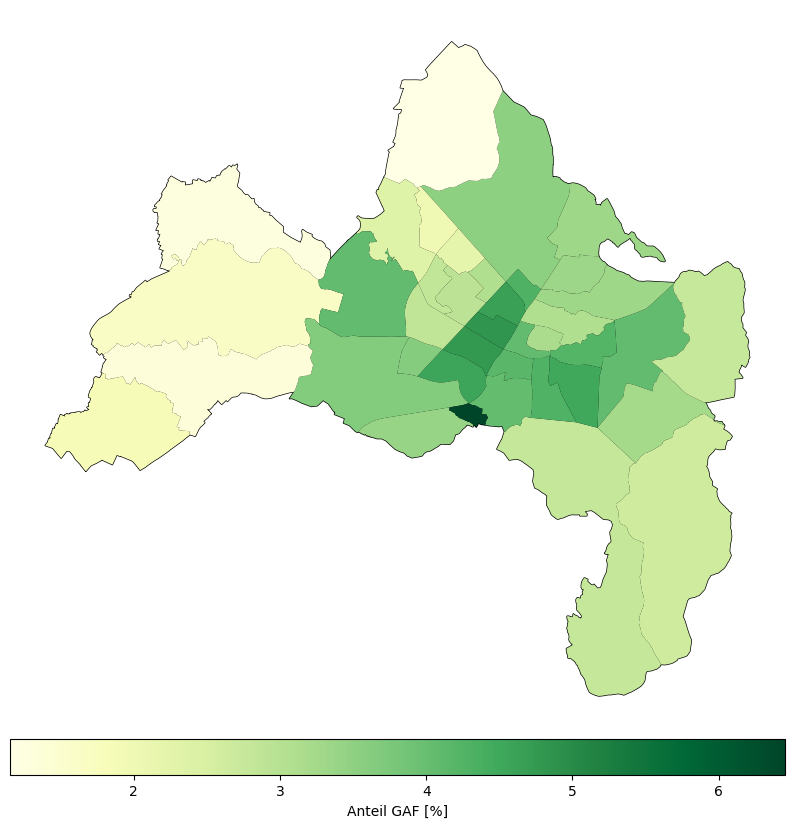

In [14]:
karte_stadtbezirke(joined,'GAF')

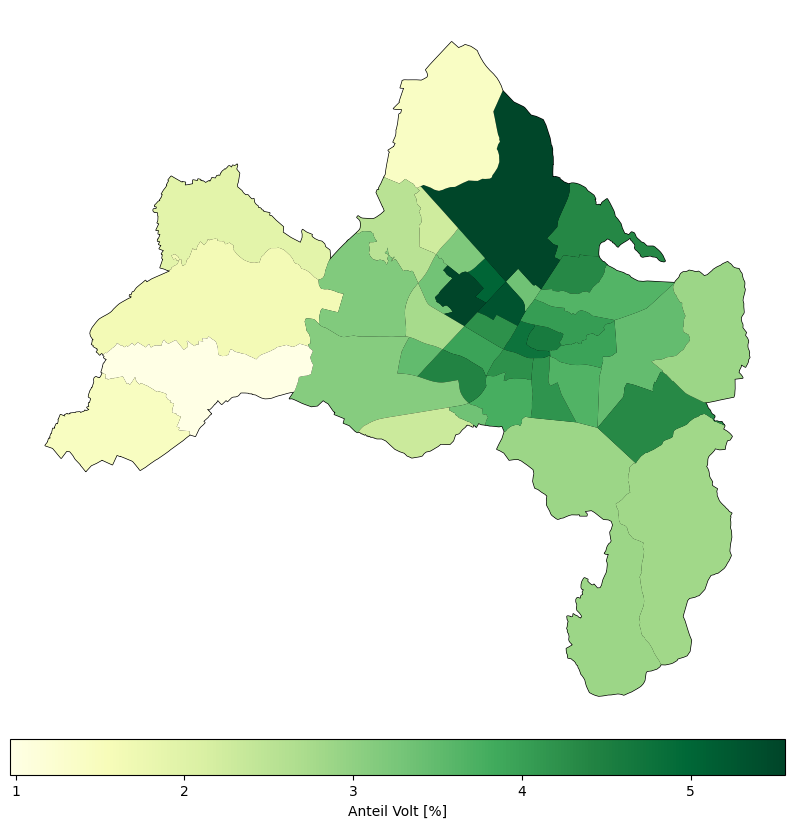

In [15]:
karte_stadtbezirke(joined,'Volt')

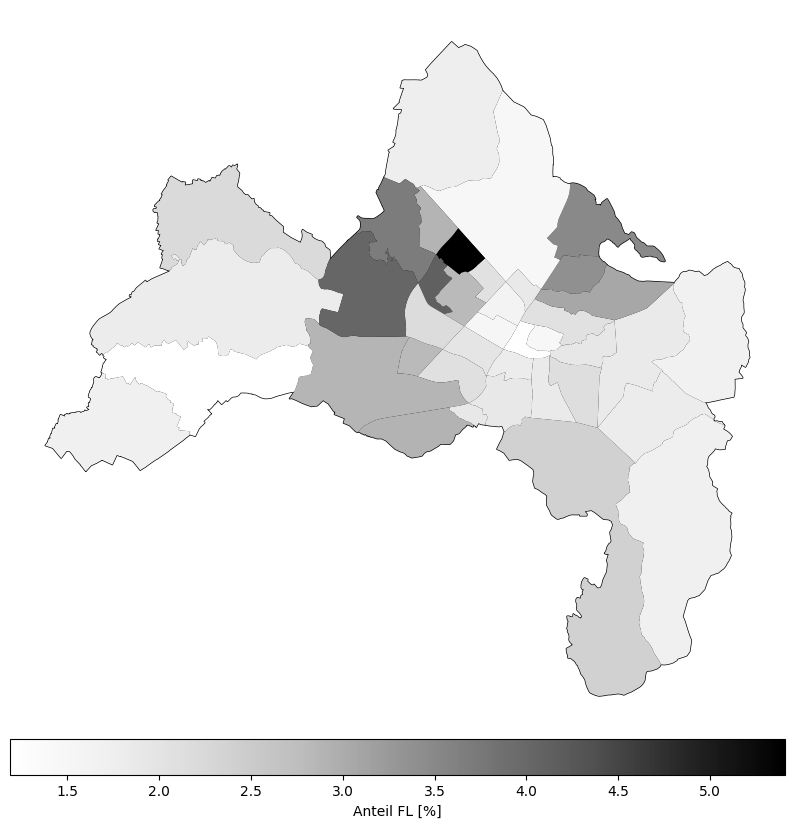

In [16]:
karte_stadtbezirke(joined,'FL')

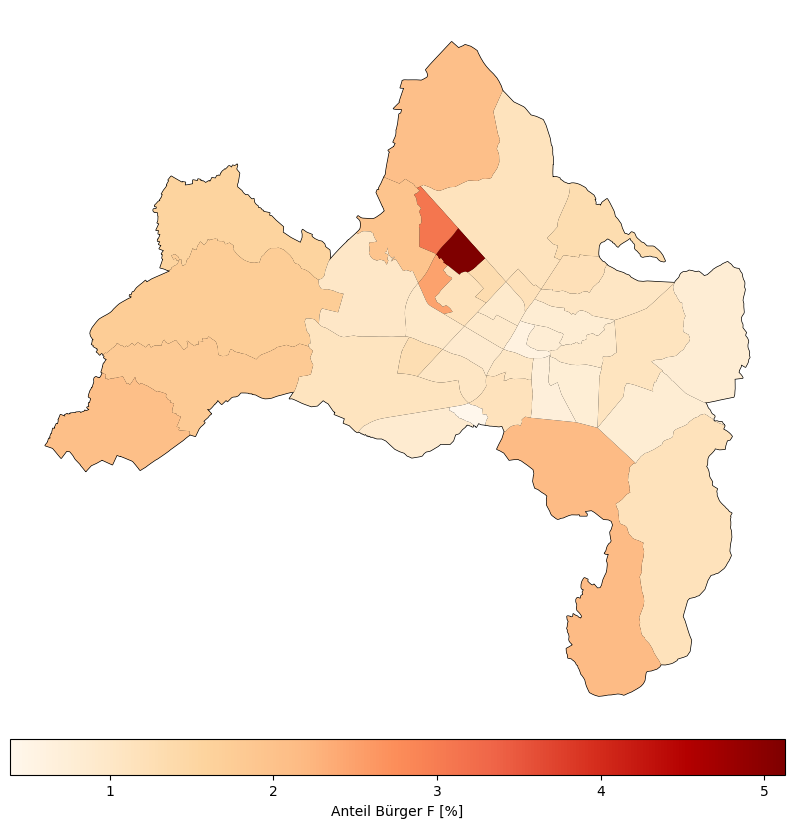

In [17]:
karte_stadtbezirke(joined,'Bürger_F')

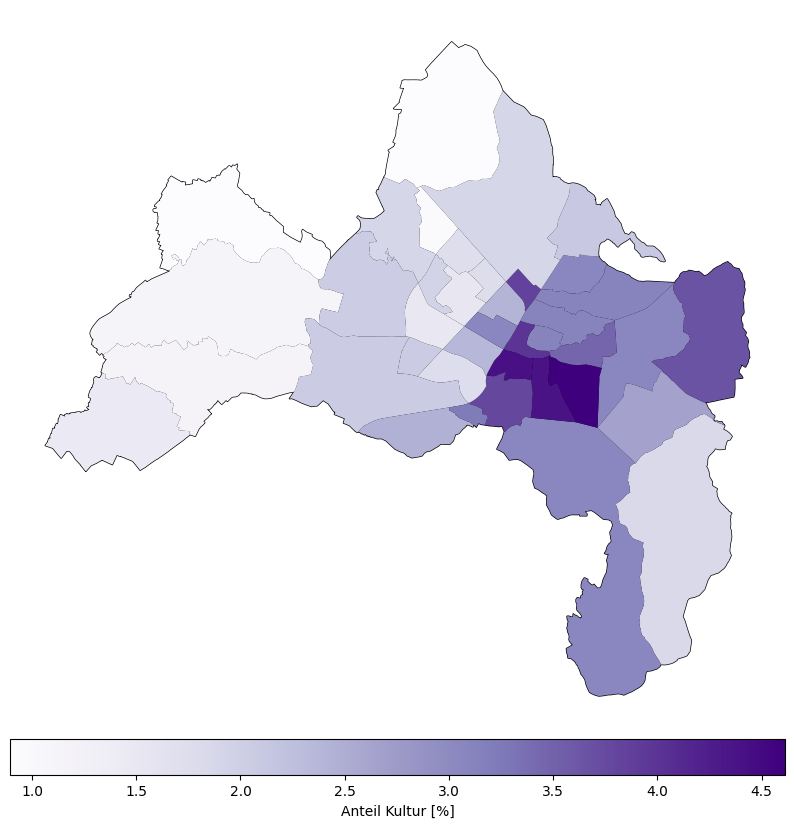

In [18]:
karte_stadtbezirke(joined,'Kultur')

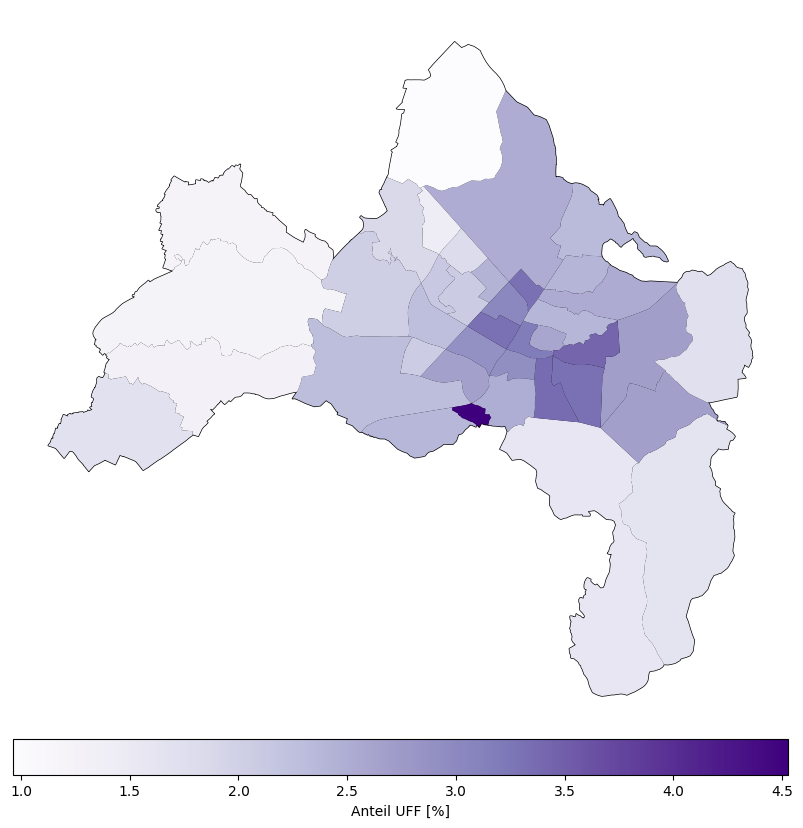

In [19]:
karte_stadtbezirke(joined,'UFF')

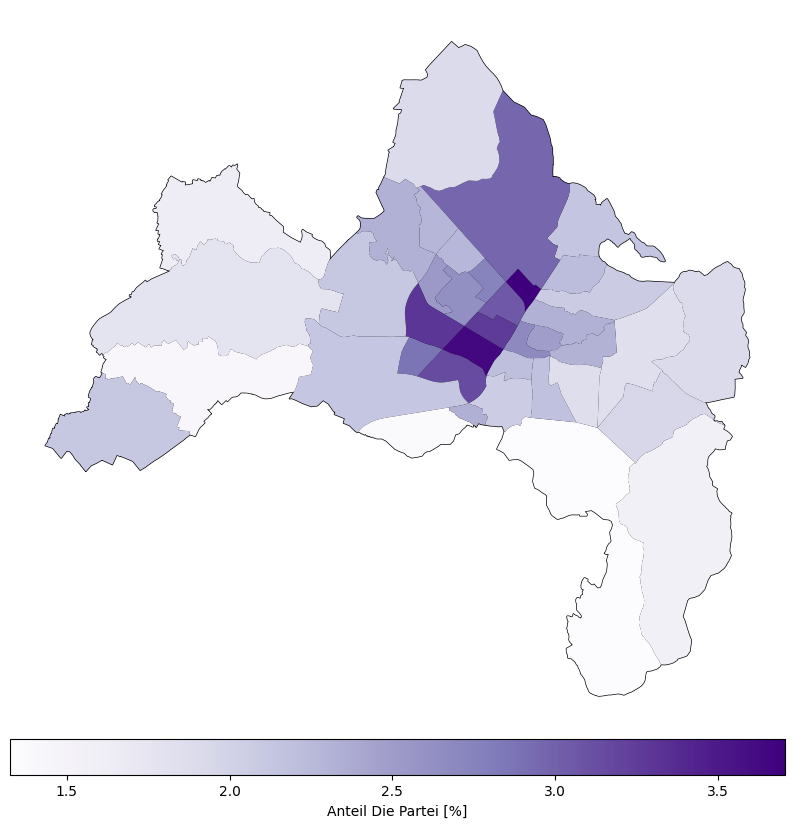

In [20]:
karte_stadtbezirke(joined,'DIE_PARTEI')

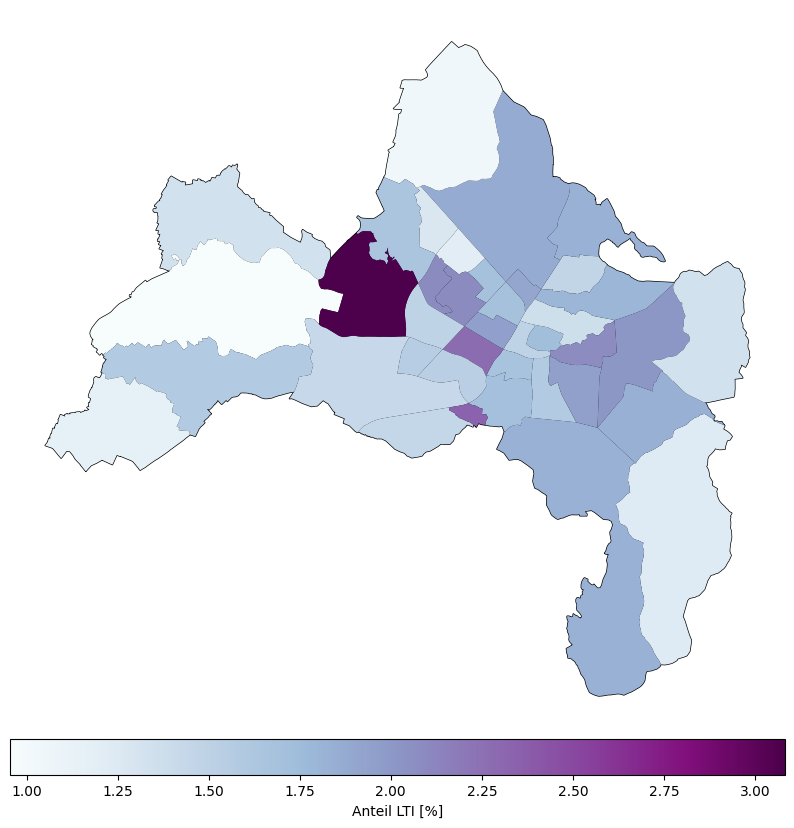

In [21]:
karte_stadtbezirke(joined,'LTI')

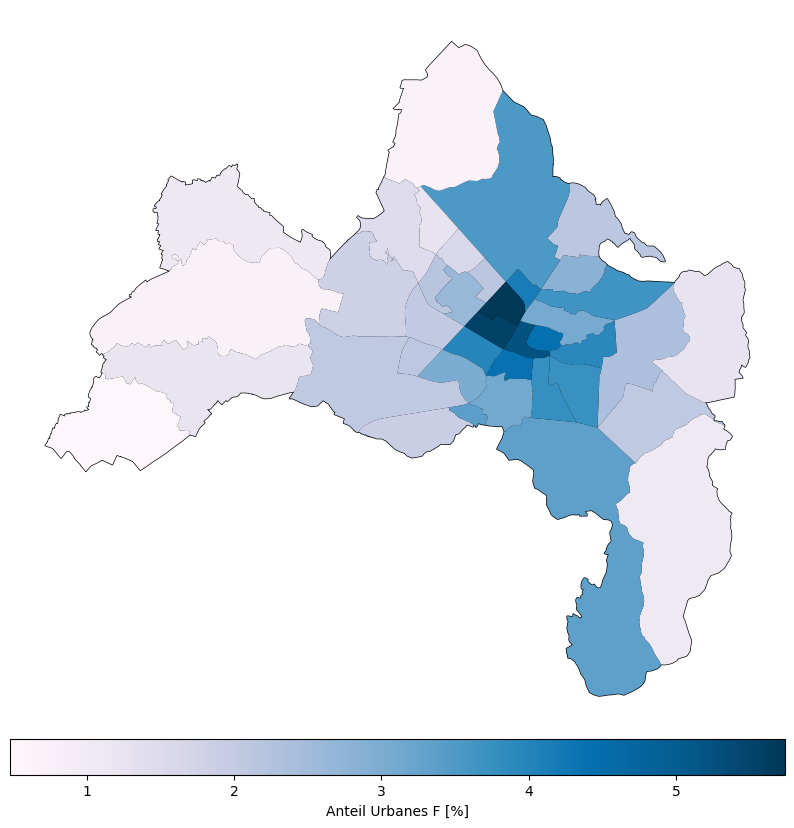

In [22]:
karte_stadtbezirke(joined,'Urbanes_F')

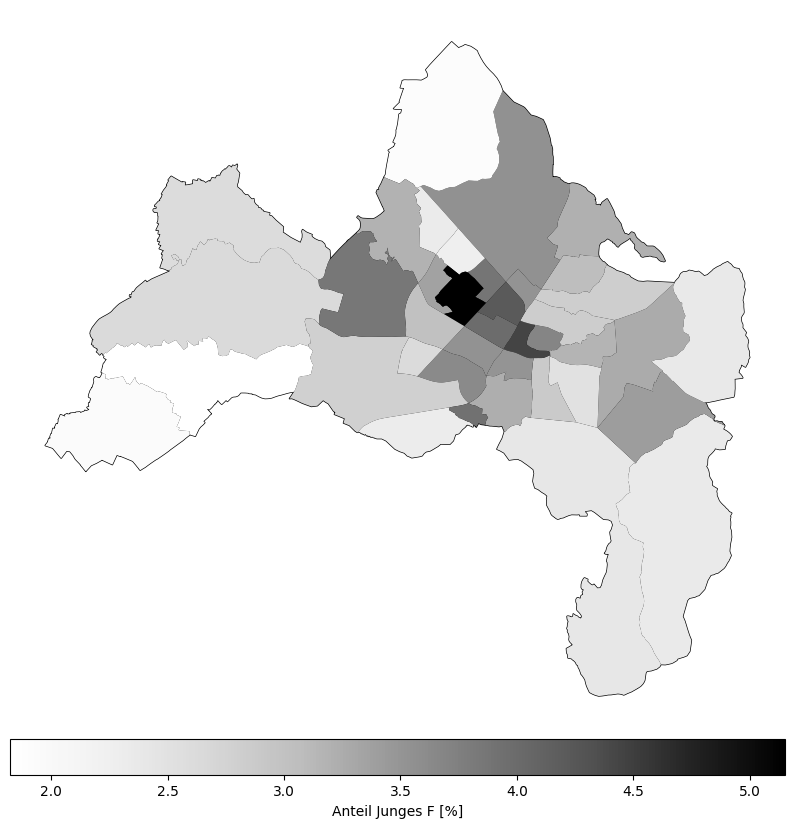

In [23]:
karte_stadtbezirke(joined,'Junges_F')

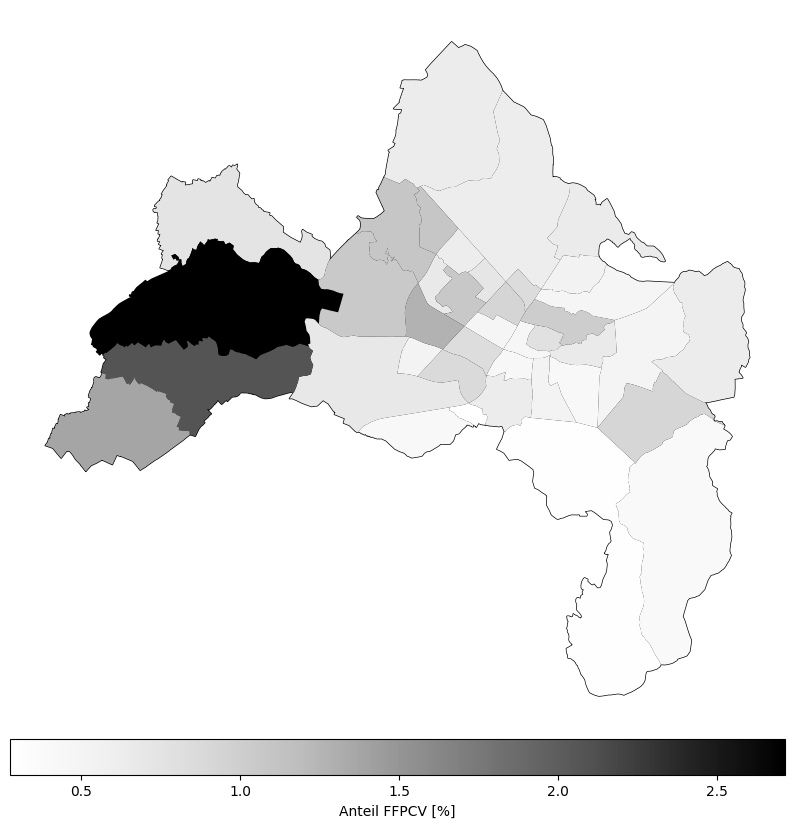

In [24]:
karte_stadtbezirke(joined,'FFPCV')

## Wahlbezirke Korrelation Parteien

Die Aehnlichkeit der prozentulen Stimmenverteilung kann Hinweise geben auf Aehnlichkeit der Waehler. 

Zunaechst die etwas groesseren Parteien. 
Ein Wert von ist exact gleich (und wird beim vergleich mit sich selbst erreicht) und wert von -1, ist exact das Gegenteil, waehrend 0 genau zufaellig ist. 

                      GRÜNE_prozent_gem24  CDU_prozent_gem24  \
GRÜNE_prozent_gem24              1.000000          -0.404418   
CDU_prozent_gem24               -0.404418           1.000000   
SPD_prozent_gem24               -0.372112           0.130443   
FDP_prozent_gem24               -0.082852           0.535423   
LiSSt._prozent_gem24             0.216436          -0.770090   
AfD_prozent_gem24               -0.725063           0.117757   
FW_prozent_gem24                -0.586882           0.693898   

                      SPD_prozent_gem24  FDP_prozent_gem24  \
GRÜNE_prozent_gem24           -0.372112          -0.082852   
CDU_prozent_gem24              0.130443           0.535423   
SPD_prozent_gem24              1.000000           0.011873   
FDP_prozent_gem24              0.011873           1.000000   
LiSSt._prozent_gem24          -0.239454          -0.612718   
AfD_prozent_gem24              0.166885          -0.156473   
FW_prozent_gem24               0.206424           0.3

<AxesSubplot:>

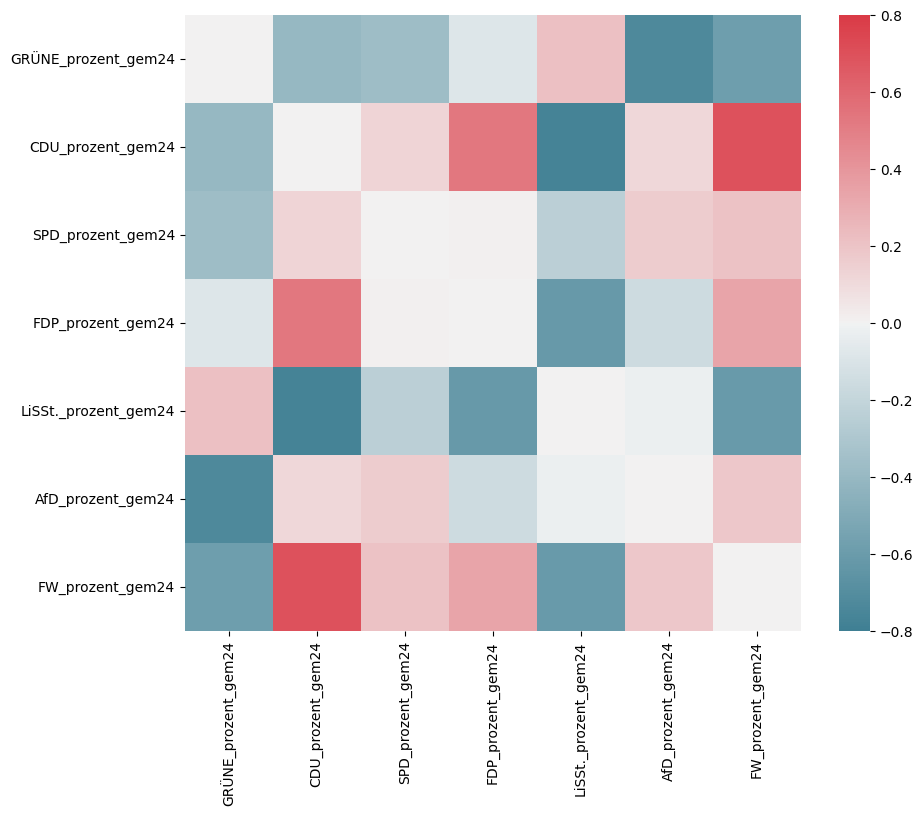

In [82]:
corr_wahlbezirke=wahl_bezirke.loc[:,['GRÜNE_prozent_gem24','CDU_prozent_gem24','SPD_prozent_gem24','FDP_prozent_gem24','LiSSt._prozent_gem24','AfD_prozent_gem24','FW_prozent_gem24']].corr()

print(corr_wahlbezirke)
import seaborn as sns
for i in range(corr_wahlbezirke.shape[0]):
    corr_wahlbezirke.iloc[i,i]=0
f, ax = plt.subplots(figsize=(10, 8))    
sns.heatmap(corr_wahlbezirke,vmin=-0.8,vmax=0.8,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    square=True, ax=ax,annot_kws=partei_gem)

Die Gruenenwahler verteilen verschieden von allen anderen Waehlern, eine kleine Aehnlichkeit besteht zu linker Liste. Der groeste Unterschied besteht zu AfD. 

CDU Waehler verteilen sich aehnlich wie FW Waehler und FDP Waehler.  Der groeste Unterschied besteht zu Linke Liste. 

SPD Waehler verteilen  verschieden von allen anderen Waehlern, eine kleine Aehnlichkeit besteht zu freien Waehlern.  Der groeste Unterschied besteht zu Gruenen, aber so gross wie fuer andere Parteien. 


FDP Waehler verteilen sich aehnlich wie CDU Waehler und Freie Waehler.  Der groeste Unterschied besteht zu Linke Liste. 

Linke Liste  Waehler  verschieden von allen anderen Waehlern, eine kleine Aehnlichkeit besteht zu Gruenen.
 Der groeste Unterschied besteht zu CDU. 

AfD waehler verteilen sich verschieden von allen adneren Waehler,  eine sehr kleine Aehnlichkeit besteht zu Freien Waehlern und SPD. 
 Der groeste Unterschied besteht zu Gruenen. 



In [ ]:
Nun die kleineren. 

In [62]:
corr_wahlbezirke2=wahl_bezirke.loc[:,['CDU_prozent_gem24', 'GRÜNE_prozent_gem24', 'SPD_prozent_gem24',
       'AfD_prozent_gem24', 'FDP_prozent_gem24', 'FW_prozent_gem24',
       'LiSSt._prozent_gem24', 'DIE_PARTEI_prozent_gem24', 'GAF_prozent_gem24',
       'FL_prozent_gem24', 'Volt_prozent_gem24', 'Junges_F_prozent_gem24',
       'Urbanes_F_prozent_gem24', 'Kultur_prozent_gem24',
       'Bürger_F_prozent_gem24', 'UFF_prozent_gem24', 'LTI_prozent_gem24',
       'APPD_prozent_gem24', 'FFPCV_prozent_gem24',
       'Meinrad_Spitz_prozent_gem24']].corr()

In [77]:
print(corr_wahlbezirke2.iloc[14:,:].T)

                             Bürger_F_prozent_gem24  UFF_prozent_gem24  \
CDU_prozent_gem24                          0.373419          -0.683034   
GRÜNE_prozent_gem24                       -0.485373           0.525266   
SPD_prozent_gem24                          0.282778          -0.245955   
AfD_prozent_gem24                          0.283658          -0.392673   
FDP_prozent_gem24                          0.120487          -0.380375   
FW_prozent_gem24                           0.433316          -0.611861   
LiSSt._prozent_gem24                      -0.398087           0.588599   
DIE_PARTEI_prozent_gem24                  -0.155940           0.181202   
GAF_prozent_gem24                         -0.439941           0.677955   
FL_prozent_gem24                           0.415295          -0.213758   
Volt_prozent_gem24                        -0.327912           0.372416   
Junges_F_prozent_gem24                    -0.278047           0.307809   
Urbanes_F_prozent_gem24               

['CDU', 'GRÜNE', 'SPD', 'AfD', 'FDP', 'FW', 'LiSSt.', 'DIE_PARTEI', 'GAF', 'FL', 'Volt', 'Junges_F', 'Urbanes_F', 'Kultur', 'Bürger_F', 'UFF', 'LTI', 'APPD', 'FFPCV', 'Meinrad_Spitz', 'Gueltige_Stimmen']


<AxesSubplot:>

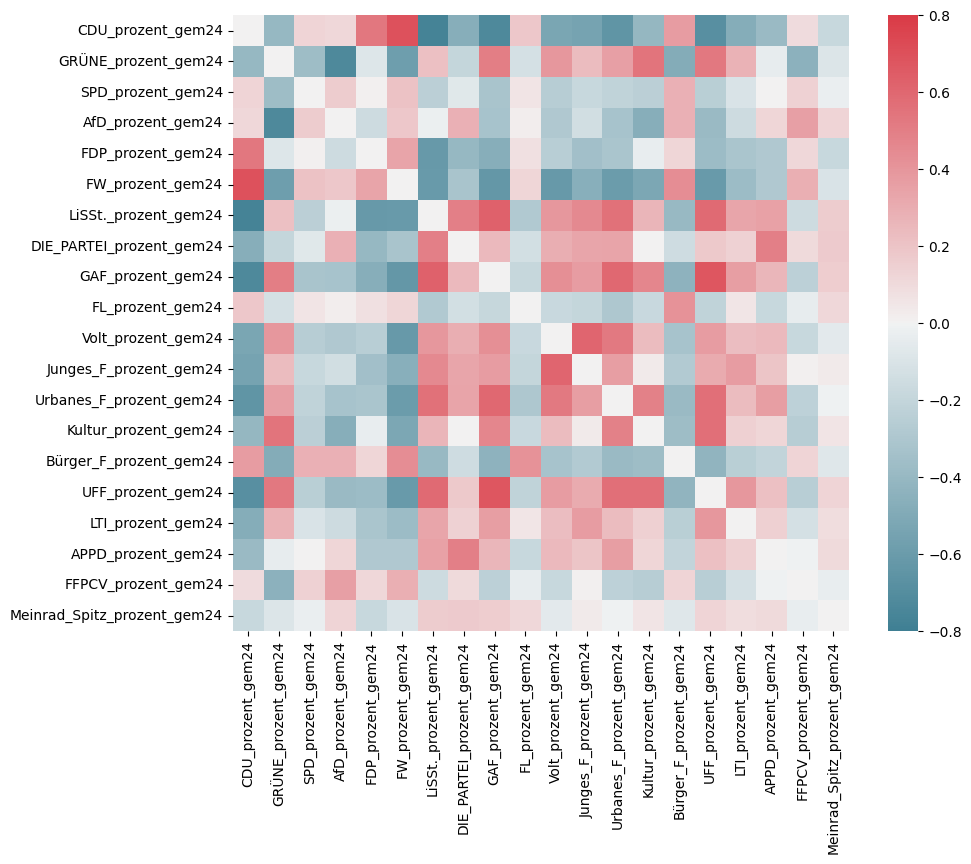

In [75]:
import seaborn as sns
for i in range(corr_wahlbezirke2.shape[0]):
    corr_wahlbezirke2.iloc[i,i]=0
f, ax = plt.subplots(figsize=(10, 8))    
sns.heatmap(corr_wahlbezirke2,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-0.8, vmax=0.8,
    square=True, ax=ax,annot_kws=partei_gem)

Die PARTEI ist am aehnlichsten zu APPD und Linker Liste, und am verschiedensten zu CDU.

Die GAF ist am aehnlichsten zu UFF, und Linker Liste, und am verschiedensten zu CDU.

Freiburg Lebenswert ist am aehnlichsten zu Buerger Freiburg, und am verschiedensten zu Linker Liste und Urbanes.

Volt ist am aehnlichsten zu Junges F, und am verschiedensten zu FW und CDU.

Urbanes Freiburg ist am aehnlichsten zu GAF und Linker Liste, und am verschiedensten zu CDU.

Die Kulturliste ist am aehnlichsten zu UFF, und Gruenen, und am verschiedensten zu FW und CDU.

Die Buerger Freiburg ist am aehnlichsten die Freiburg Lebenswerty, CDu, und FW und am verschiedensten zu den Gruenen. 

Die Liste Teilhabe und Inklusion ist am aehnlichsten zu GAF, UFF und Junges Freiburg und am verschiedensten zu  CDU

Fuer Freiburg Politik aus Christlicher Verantwortung ist aehnlich zu AfD und FW, und am verscheidensten zu Gruenen. 

Meinrad Spitze hat keine relvante Aehnlichkeit. 